In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import tensorflow as tf
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

crypto_currency = 'ETH'
against_currency = 'INR'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

#print(data.head())
#perpare_data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60
future_day = 31

x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+future_day, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        


In [10]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Epoch 1/25
52/52 [==============================] - 6s 31ms/step - loss: 0.0240
Epoch 2/25
52/52 [==============================] - 2s 32ms/step - loss: 0.0130
Epoch 3/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0120
Epoch 4/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0107
Epoch 5/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0111
Epoch 6/25
52/52 [==============================] - 2s 32ms/step - loss: 0.0104
Epoch 7/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0104
Epoch 8/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0105
Epoch 9/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0097
Epoch 10/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0102
Epoch 11/25
52/52 [==============================] - 2s 32ms/step - loss: 0.0104
Epoch 12/25
52/52 [==============================] - 2s 31ms/step - loss: 0.0101
Epoch 13/25
52/52 [==================

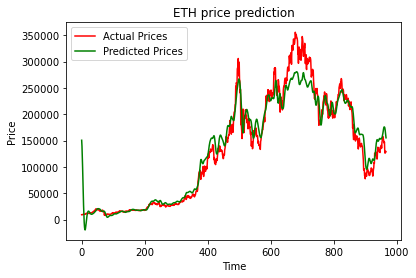

1/1 [==============================] - 1s 1s/step



In [32]:
#Create the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import datetime as dt
model = Sequential()
        
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
                          
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)
                  
#Testing the model

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()          
                  
test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)                
actual_prices = test_data['Close'].values        
        
total_dataset = pd.concat((data['Close'], test_data['Close']))
          
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)
          
x_test = []
          
for x in range(prediction_days, len(model_inputs)):
          x_test.append(model_inputs[x-prediction_days:x, 0])
          
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
                    
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)
                    
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()
          
#Predict next day
 
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print()          